In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


dataframe = pd.read_csv('./../LCO-Datasets/911.csv')

In [2]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [3]:
dataframe.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
# Top 5 zip codes
dataframe['zip'].value_counts().head(5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [5]:
# top 5 twps
dataframe['twp'].value_counts().head(5)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

In [6]:
# Unique reasons to call 911
dataframe['title'].nunique()

131

In [7]:
# Top 5 Spefic reasons to call 911
dataframe['SpeficReason'] = dataframe['title'].apply(lambda title: title.split(':')[1])

In [8]:
dataframe.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpeficReason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS


In [9]:
dataframe['SpeficReason'].value_counts().head(5)

 VEHICLE ACCIDENT -       68123
 DISABLED VEHICLE -       20667
 VEHICLE ACCIDENT         16747
 FIRE ALARM               16359
 RESPIRATORY EMERGENCY    14637
Name: SpeficReason, dtype: int64

<AxesSubplot:xlabel='SpeficReason', ylabel='count'>

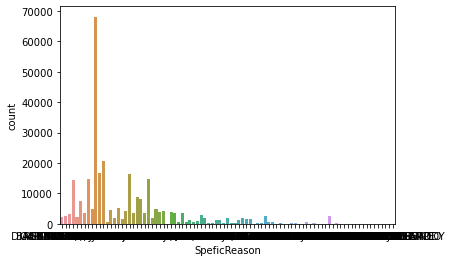

In [13]:
sns.countplot(x='SpeficReason',data=dataframe)

In [14]:
dataframe['timeStamp'] = pd.to_datetime(dataframe['timeStamp'])

In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   lat           289240 non-null  float64       
 1   lng           289240 non-null  float64       
 2   desc          289240 non-null  object        
 3   zip           253942 non-null  float64       
 4   title         289240 non-null  object        
 5   timeStamp     289240 non-null  datetime64[ns]
 6   twp           289137 non-null  object        
 7   addr          289240 non-null  object        
 8   e             289240 non-null  int64         
 9   SpeficReason  289240 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 22.1+ MB


In [17]:
# Create 3 columns for day, hours, months
dataframe['Hour'] = dataframe['timeStamp'].apply(lambda time: time.hour)

In [20]:
dataframe['Day'] = dataframe['timeStamp'].apply(lambda time: time.day)
dataframe['Month'] = dataframe['timeStamp'].apply(lambda time: time.month)

In [22]:
dataframe['DayOfWeek'] = dataframe['timeStamp'].apply(lambda time: time.day_of_week)

In [23]:

dataframe['DayOfWeek']

0         3
1         3
2         3
3         3
4         3
         ..
289235    5
289236    5
289237    5
289238    5
289239    5
Name: DayOfWeek, Length: 289240, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='count'>

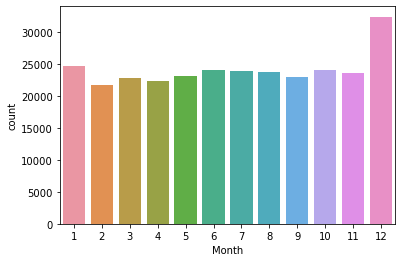

In [27]:
# plot a graph for month
sns.countplot(x='Month',data=dataframe
             )

In [29]:
# use group by method in pandas
byMonth = dataframe.groupby('Month').count()

<AxesSubplot:xlabel='Month'>

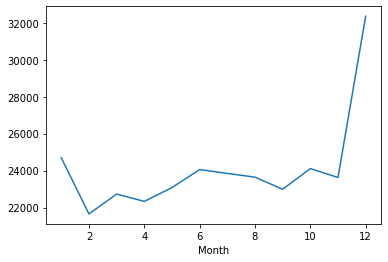

In [31]:
byMonth['twp'].plot()